
#  Decision Trees
#### Objectives:
1. Decision Trees
  * Sklearn
  * Visualize DT
  * Gini, entropy
  * Information Gain
  * Regression Trees
2. Comparison between models
  * Linearly Seperable
  * Boolean XOR
  * Moons
  * Circles



## 1. Decision Trees
### Recap

1.  What do leaves and branches represent in Decision trees?

2. When do we stop splitting the tree?

1. What is Entropy?

2. What is Information Gain?



The dataset that we will work on is the same dataset that we saw before which is Iris image calssification.

In [154]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree

iris = load_iris()
X = iris['data']
y = iris['target']

import pandas as pd
pd.DataFrame(iris.data,columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [155]:
# Write two lines of code to fit a decision tree classifier to X,Y 
decision_tree = DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth = 12, max_features=None, random_state = 0)
decision_tree.fit(X, y)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



Now let's see what kind of trees can we build with Sklearn.

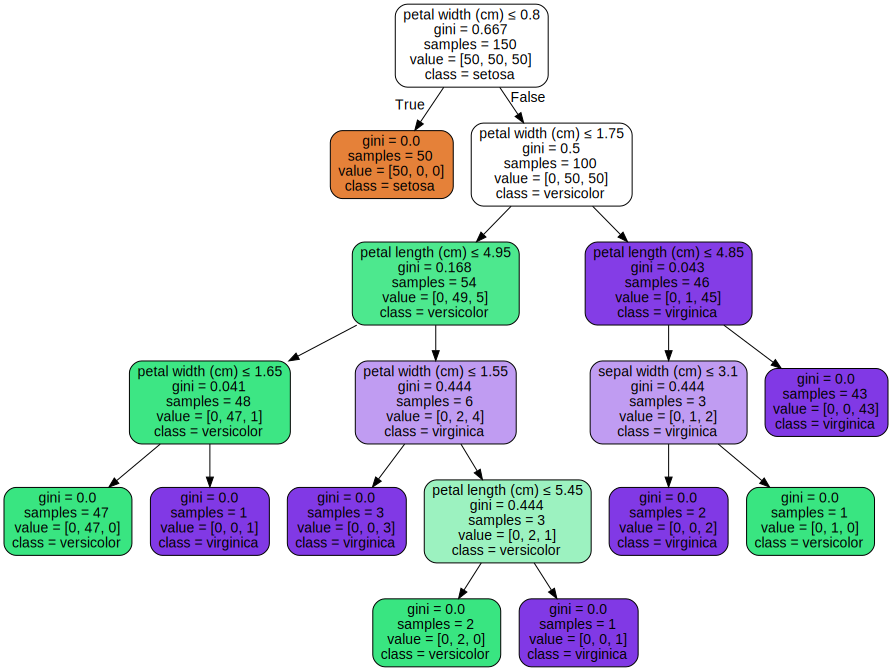

In [156]:
import graphviz 
def plot_tree(clf):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                       feature_names=iris.feature_names,  
                       class_names=iris.target_names,  
                       filled=True, rounded=True,  
                       special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph 
graph = plot_tree(decision_tree)
graph

Let's use a smaller Decison Tree and try to recreate some of the values on it.

Calculate the gini and entropy of the second branch (Petal width (cm) <= 1.75). 
you can hover over the branches to read their number.


![alt text](https://miro.medium.com/max/565/1*M15RZMSk8nGEyOnD8haF-A.png)
![alt text](https://qph.fs.quoracdn.net/main-qimg-93d3fa675b807bc505ef905c828d6c6d)






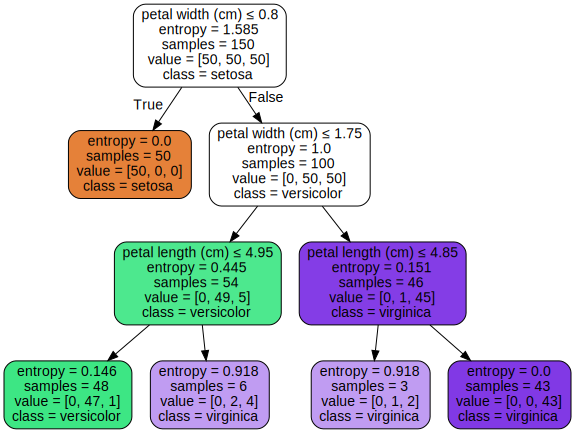

In [157]:
decision_tree = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
decision_tree = decision_tree.fit(X, y)
plot_tree(decision_tree)

In [158]:
import numpy as np
def gini(value):
    value = value / value.sum()
    gini = sum(np.square(value))    
    return 1.0 - gini
def entropy(value):
    value = value / value.sum()
    value = [i for i in value if i != 0]
    entropy = np.multiply(value, np.log2(value))
    return -sum(entropy)

value = np.array([50,50,0,10,0,10])
print("gini: {:.03}, entropy: {:.04} ".format(gini(value),entropy(value)))

gini: 0.639, entropy: 1.65 


In [167]:
def information_gain(parent, children):
    total = sum(parent)
    s = entropy(parent)  
    for child in children:
      s -= child.sum() / total * entropy(child)
    # print(children_entropy)
    # print(proportions)
     #- sum(np.multiply(children_entropy, proportions))
    return s
parent = np.array([50,50,50])
children = np.array([[50,0,0],[0,50,50]])
ig = information_gain(parent, children)
print("information gain: {:.03}".format(ig))


information gain: 0.918


**Trees for regression:**

Basic Concept:
* Split the data as before.
* To minimize the the variance of the leaf node values.
* Take the mean as the prediciton

![alt text](https://yanndubs.github.io/img/blog/decision-tree-reg.gif)

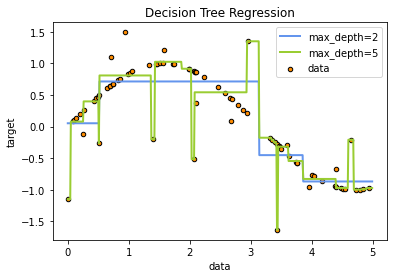

In [160]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# 2. Comparison Between models
Now that you know multiple types of classifiers:
1. Linear
  * Logistic Regression
  * SVM-(with linear kernel)
2. Non-Linear
  * SVM-(with non linear kernel)
  * KNN
  * Decision Trees
  * Gaussian Naive Bayes
  
Let's take a look how the decision boundries for some of them look like.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

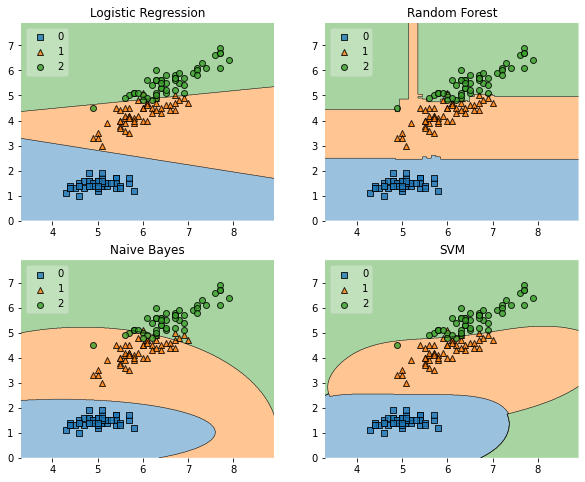

In [161]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
    


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

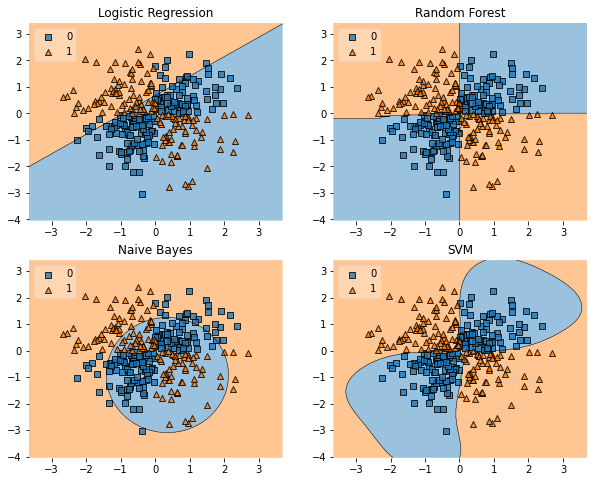

In [162]:
import itertools

import matplotlib.gridspec as gridspec
# Loading Plotting Utilities
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1, solver='lbfgs')
clf2 = RandomForestClassifier(n_estimators=100,
                              random_state=1)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0),
             dtype=int)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

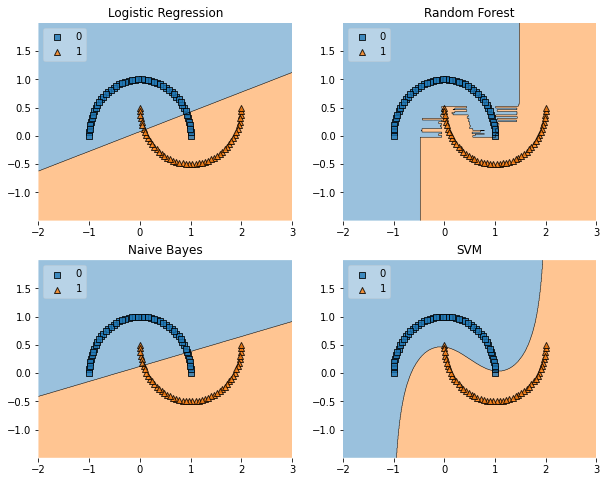

In [163]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

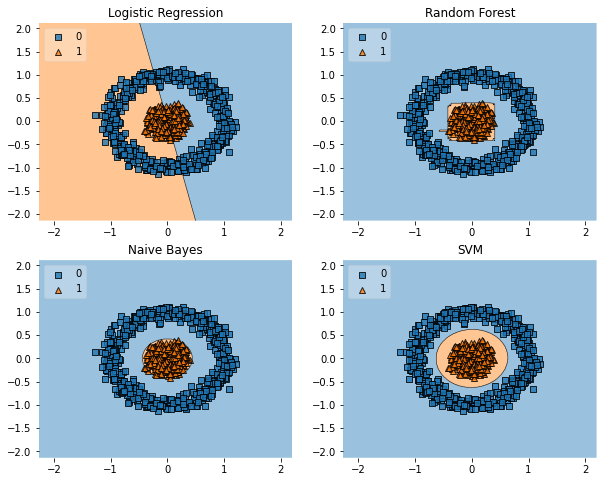

In [164]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()